### Implement Perception classifier in Python

Ref: https://lightning.ai/courses/deep-learning-fundamentals/unit-1/1-6-implementing-a-perceptron-in-python-parts-1-3/

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/perceptron_toydata-truncated.csv')
df.head(10)
# df['label'].value_counts()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
x_train = df[['x1','x2']].values
y_train = df['label'].values

#### Define plot functions

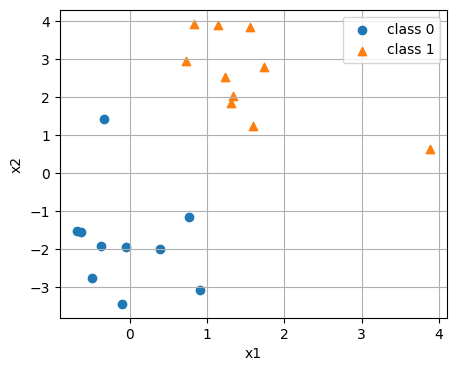

In [4]:
# plot examples
def plot_examples(x_train, y_train):
    plt.figure(figsize=(5,4))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], marker='o', label='class 0')
    plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], marker='^', label='class 1')
    plt.legend()
    plt.grid()
    plt.show()

def plot_accuracy(epochs, accuracies):
    plt.figure(figsize=(5,4))
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(epochs, accuracies)
    plt.grid()
    plt.show()

plot_examples(x_train, y_train)

#### Implement the Model

In [5]:
class Perceptron:
    
    def __init__(self, n_features: int):
        self.n_features = n_features
        self.weights = [0.0 for _ in range(n_features)]
        self.bias = 0.0

    """Predict output for a single training example
    @param x: represents a single training example. ex [x1, x2, x3, ..., xn]
    @return: 1 if weighted sum > 0, 0 otherwise
    """
    def forward(self, x: list) -> int:
        weighted_sum = self.bias
        for i, xi in enumerate(x):
            weighted_sum += self.weights[i] * xi
        return 1 if weighted_sum > 0 else 0
    
    """Update the weights and bias based on the error
    @param x: represents a single training example. ex [x1, x2, x3, ..., xn]
    @param label: represents the label for the training example
    """
    def update(self, x: list, label: int) -> tuple:
        prediction = self.forward(x)
        error = label - prediction
        self.bias += error
        for i, xi in enumerate(x):
            self.weights[i] += error * xi
        return prediction, error
    
    def calculate_accuracy(self, y_preds, y_labels):
        return np.sum(y_preds == y_labels) / len(y_labels)

    """Train the model
    @param x_train: list of training features. ex [[x1, x2, x3, ..., xn], [x1, x2, x3, ..., xn], ...]
    @param y_train: list of labels for training examples. ex [y1, y2, y3, ..., yn]
    @param epochs: number of epochs to train the model
    """
    def train(self, x_train: list, y_train: list, epochs: int):
        train_hist = {'epochs': [], 'errors': [], 'accuracies': []}

        n = len(y_train)
        for epoch in range(epochs):
            y_preds = np.zeros(n)
            n_errors = 0 # number of errors in this epoch
            for i in range(n):
                pred_i, error_i = self.update(x_train[i], y_train[i])
                y_preds[i] = pred_i
                n_errors += abs(error_i)
            accuracy = self.calculate_accuracy(y_preds, y_train)

            train_hist['epochs'].append(epoch)
            train_hist['errors'].append(n_errors)
            train_hist['accuracies'].append(accuracy)
            print(f'epoch {epoch}: error = {n_errors}, accuracy = {accuracy}')

        plot_accuracy(train_hist['epochs'], train_hist['accuracies'])
        self.plot_decision_boundary(x_train, y_train)
        return train_hist
    
    """Predict output for a list of test examples
    @param x_test: list of test examples. ex [[x1, x2, x3, ..., xn], [x1, x2, x3, ..., xn], ...]
    @return: list of predictions. ex [y1, y2, y3, ..., yn]
    """
    def predict(self, x_test: list) -> list:
        return [self.forward(x) for x in x_test]
    
    def plot_decision_boundary(self, x_train, y_train):
        plt.figure(figsize=(5,4))
        plt.title('Decision Boundary')
        
        # plot examples
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], marker='o', label='class 0')
        plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], marker='^', label='class 1')

        # plot decision boundary
        x11, x21 = 5, -(self.bias + 5*self.weights[0]) / self.weights[1]
        x12, x22 = -(self.bias + 5*self.weights[1]) / self.weights[0], 5
        plt.plot([x11, x12], [x21, x22], label='Decision Boundary')
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)

        plt.legend()
        plt.grid()
        plt.show()

#### Training

epoch 0: error = 1, accuracy = 0.95
epoch 1: error = 3, accuracy = 0.85
epoch 2: error = 1, accuracy = 0.95
epoch 3: error = 0, accuracy = 1.0
epoch 4: error = 0, accuracy = 1.0


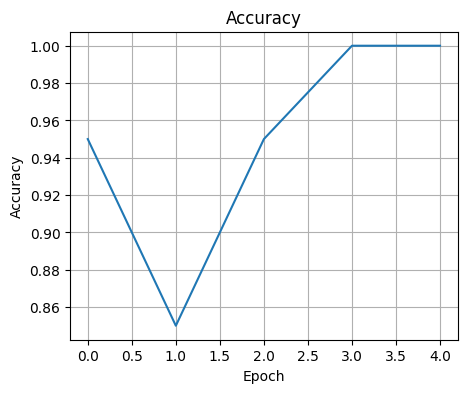

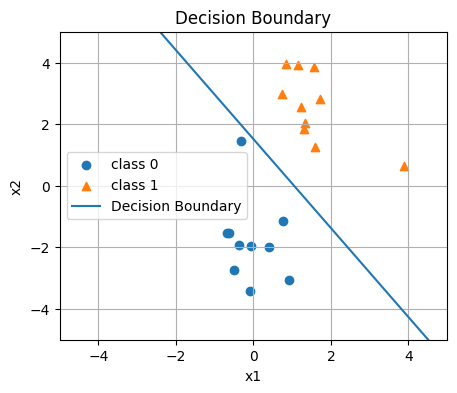

{'epochs': [0, 1, 2, 3, 4],
 'errors': [1, 3, 1, 0, 0],
 'accuracies': [0.95, 0.85, 0.95, 1.0, 1.0]}

In [6]:
model = Perceptron(2)
model.train(x_train, y_train, 5)